<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/spring-24/notebooks/Descriptive_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demostrates how to:
1. read in a table,
2. calculate descriptive statistics,
3. plot a histogram
4. join with a GIS bounary file
5. make a map of data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The data was downloaded from the Census Bureau. The original data source was American Community Survey 2021 5-year estimates.

In [2]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/Florida_counties_median_income_2021.csv"
income_table = pd.read_csv(url)

In [3]:
income_table.head()

,Geo_ID,Name,Median_income
0,0500000US12001,"Alachua County, Florida",53314
1,0500000US12003,"Baker County, Florida",63860
2,0500000US12005,"Bay County, Florida",60473
3,0500000US12007,"Bradford County, Florida",48803
4,0500000US12009,"Brevard County, Florida",63632


In [4]:
income_table.columns

Index(['Geo_ID', 'Name', 'Median_income'], dtype='object')

Check out the columns

In [5]:
income_table.columns

Index(['Geo_ID', 'Name', 'Median_income'], dtype='object')

The table have three columns:
1. **Geo_ID**: each county has a unique Geo ID
2. **Name**: County Name
3. **Median_income**: Median household income within a county

In [6]:
income_table

,Geo_ID,Name,Median_income
0,0500000US12001,"Alachua County, Florida",53314
1,0500000US12003,"Baker County, Florida",63860
2,0500000US12005,"Bay County, Florida",60473
3,0500000US12007,"Bradford County, Florida",48803
4,0500000US12009,"Brevard County, Florida",63632
...,...,...,...
62,0500000US12125,"Union County, Florida",55463
63,0500000US12127,"Volusia County, Florida",56786
64,0500000US12129,"Wakulla County, Florida",72941
65,0500000US12131,"Walton County, Florida",68111


# Histogram

We can make a histogram of a given column by using the `.hist()` function.

Text(0, 0.5, 'Number of Counties')

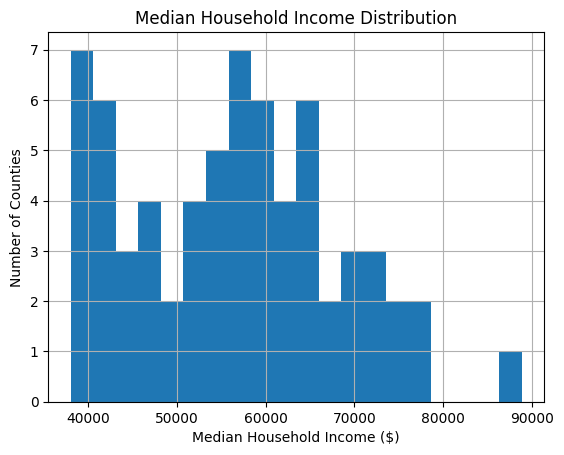

In [7]:
#Docs for .hist(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
income_table.Median_income.hist(bins=20)

#Add a title to the plot
plt.title("Median Household Income Distribution")

#Add a label to the x-axis
plt.xlabel("Median Household Income ($)")

#Add a label to the y-axis
plt.ylabel("Number of Counties")

Text(0.5, 1.0, 'Median Household Income Distribution for Counties in FL')

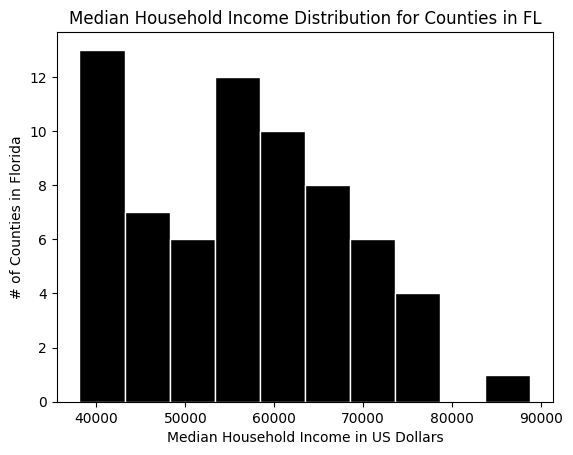

In [8]:
income_table.Median_income.hist(bins=10,color='black', edgecolor='white')

plt.xlabel("Median Household Income in US Dollars")
plt.ylabel("# of Counties in Florida")

plt.grid(False)

plt.title("Median Household Income Distribution for Counties in FL")

# Descriptive Statistics

In [9]:
income_table.Median_income.mean()






56360.53731343283

In [10]:
income_table.Median_income.median()

56786.0

In [11]:
print("HH median income Mean",income_table.Median_income.mean())

HH median income Mean 56360.53731343283


In [12]:
print("HH median income Median",income_table.Median_income.median())

HH median income Median 56786.0


In [13]:
print("HH median income Standard Deviation",income_table.Median_income.std())

HH median income Standard Deviation 11801.24258522825


A league table can be made by sorting the values of a column ascendingly or descendingly.

In [14]:
income_table.sort_values('Median_income',ascending=True).head()

,Geo_ID,Name,Median_income
20,0500000US12043,"Glades County, Florida",38088
6,0500000US12013,"Calhoun County, Florida",38098
24,0500000US12051,"Hendry County, Florida",38843
22,0500000US12047,"Hamilton County, Florida",39346
38,0500000US12079,"Madison County, Florida",39503


## Joining a table to a GIS file
The table we read in does not have geometries, but it does have an ID that can be used to match with a GIS file we can download from elsewhere (e.g. from A1).

In [15]:
import geopandas as gpd

In [16]:
fl_county = gpd.read_file("https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/florida_counties_polygon.geojson")

<Axes: >

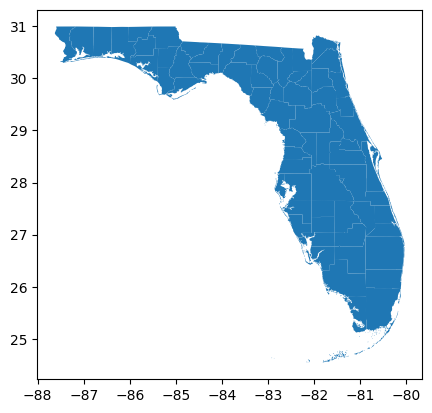

In [17]:
fl_county.plot()

For this data, the County has a 3-digit code called COUNTY.

In [18]:
fl_county.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,4.873000e+05,"POLYGON ((-82.65814 29.83028, -82.65887 29.830..."
1,2,54,107,PUTNAM,2000-05-16 00:00:00+00:00,2.305869e+10,7.629677e+05,"POLYGON ((-81.58084 29.83956, -81.60611 29.839..."
2,3,62,123,TAYLOR,2000-05-16 00:00:00+00:00,2.891747e+10,8.772527e+05,"MULTIPOLYGON (((-83.73037 30.30358, -83.73987 ..."
3,4,46,091,OKALOOSA,2000-05-16 00:00:00+00:00,2.562159e+10,1.087058e+06,"MULTIPOLYGON (((-86.39159 30.64970, -86.39157 ..."
4,5,7,013,CALHOUN,2000-05-16 00:00:00+00:00,1.604809e+10,6.313440e+05,"POLYGON ((-84.93266 30.60637, -84.95729 30.606..."


Remember in our income data the ID is a long text. However, the last 3-digit should match.

In [19]:
income_table.Geo_ID

0     0500000US12001
1     0500000US12003
2     0500000US12005
3     0500000US12007
4     0500000US12009
           ...      
62    0500000US12125
63    0500000US12127
64    0500000US12129
65    0500000US12131
66    0500000US12133
Name: Geo_ID, Length: 67, dtype: object

We are able to extract the last 3-digit using some string handling function `.slice()`.

You can define the `start` or `stop` to slice the text. A negative value is going from the last to the begining. So `start=-3` means we are getting the last three digits from the text.

In [20]:
income_table.Geo_ID.str.slice(start=-3)

0     001
1     003
2     005
3     007
4     009
     ... 
62    125
63    127
64    129
65    131
66    133
Name: Geo_ID, Length: 67, dtype: object

Add a new column in the data to store the 3-digit ID.

In [21]:
income_table["ID_3"] = income_table.Geo_ID.str.slice(start=-3)

In [22]:
income_table.head()

,Geo_ID,Name,Median_income,ID_3
0,0500000US12001,"Alachua County, Florida",53314,001
1,0500000US12003,"Baker County, Florida",63860,003
2,0500000US12005,"Bay County, Florida",60473,005
3,0500000US12007,"Bradford County, Florida",48803,007
4,0500000US12009,"Brevard County, Florida",63632,009


In [23]:
fl_county.COUNTY

0     041
1     107
2     123
3     091
4     013
     ... 
62    033
63    093
64    037
65    001
66    109
Name: COUNTY, Length: 67, dtype: object

Now we seem to have a matching column, we then join them together.

`pd.merge` function merges two tables together, you need to specify the column name in each table to match.

In [24]:
merged = pd.merge(fl_county, income_table, left_on="COUNTY", right_on="ID_3")

In [25]:
merged.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry,Geo_ID,Name,Median_income,ID_3
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,4.873000e+05,"POLYGON ((-82.65814 29.83028, -82.65887 29.830...",0500000US12041,"Gilchrist County, Florida",50983,041
1,2,54,107,PUTNAM,2000-05-16 00:00:00+00:00,2.305869e+10,7.629677e+05,"POLYGON ((-81.58084 29.83956, -81.60611 29.839...",0500000US12107,"Putnam County, Florida",39975,107
2,3,62,123,TAYLOR,2000-05-16 00:00:00+00:00,2.891747e+10,8.772527e+05,"MULTIPOLYGON (((-83.73037 30.30358, -83.73987 ...",0500000US12123,"Taylor County, Florida",43563,123
3,4,46,091,OKALOOSA,2000-05-16 00:00:00+00:00,2.562159e+10,1.087058e+06,"MULTIPOLYGON (((-86.39159 30.64970, -86.39157 ...",0500000US12091,"Okaloosa County, Florida",67390,091
4,5,7,013,CALHOUN,2000-05-16 00:00:00+00:00,1.604809e+10,6.313440e+05,"POLYGON ((-84.93266 30.60637, -84.95729 30.606...",0500000US12013,"Calhoun County, Florida",38098,013


We can now make the map!

<Axes: >

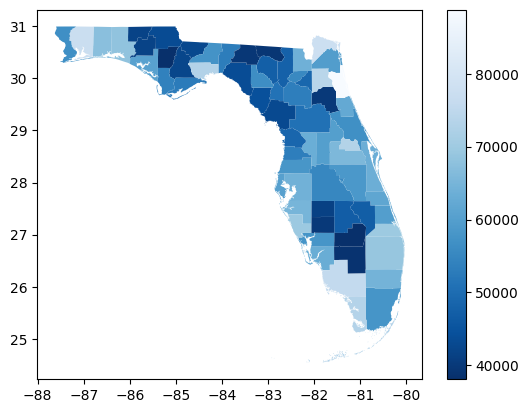

In [26]:
merged.plot(column="Median_income",legend=True,cmap="Blues_r")